<a href="https://colab.research.google.com/github/shaistha24/recommendation_system/blob/main/popularity_based_%2B_content_based_recsys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please create a copy before making any edits

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Building Recommender ML Systems for Anime Dataset

In [ ]:
# import all the libraries needed to run this notebook
import numpy as np
import pandas as pd
import re #regex
import string
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

## Explorig the Datasets

In [ ]:
anime = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/anime_dataset/anime.csv")
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
anime.shape

(12294, 7)

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
rating = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/anime_dataset/rating.csv")
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
rating.shape

(7813737, 3)

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


## Data Cleaning 


Removing unwanted symbols to make the anime names readable and clear!

In [ ]:
anime["name"] = anime["name"].map(lambda name:re.sub('[^A-Za-z0-9]+', " ", name))

In [ ]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama 039,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
anime["name"].unique()[0:10]

array(['Kimi no Na wa ', 'Fullmetal Alchemist Brotherhood', 'Gintama ',
       'Steins Gate', 'Gintama 039 ',
       'Haikyuu Karasuno Koukou VS Shiratorizawa Gakuen Koukou',
       'Hunter x Hunter 2011 ', 'Ginga Eiyuu Densetsu',
       'Gintama Movie Kanketsu hen Yorozuya yo Eien Nare',
       'Gintama 039 Enchousen'], dtype=object)

In [ ]:
anime.episodes.unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [ ]:
anime[anime['episodes'] == "Unknown"].head()  

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
991,966,Crayon Shin chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267
1021,33157,Tanaka kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400


In [ ]:
anime.episodes.replace({'Unknown':np.nan},inplace=True)

Merging the datasets

In [ ]:
anime_rating=pd.merge(anime,rating,on='anime_id')
anime_rating.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [ ]:
anime_rating.rename(columns={'rating_x':'avg_rating','rating_y':'user_rating'},inplace=True)
anime_rating.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,user_rating
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


Check Dimensions - compare with anime.csv and rating.csv

In [ ]:
anime.shape

(12294, 7)

In [ ]:
rating.shape

(7813737, 3)

In [ ]:
anime_rating.shape

(7813727, 9)

Data Types

In [ ]:
anime_rating.dtypes

anime_id         int64
name            object
genre           object
type            object
episodes        object
avg_rating     float64
members          int64
user_id          int64
user_rating      int64
dtype: object

In [ ]:
# Change anime_id and user_id to object type as they are unique!
anime_rating['anime_id']=anime_rating.anime_id.astype('object')
anime_rating['user_id']=anime_rating.user_id.astype('object')


anime_rating.dtypes

anime_id        object
name            object
genre           object
type            object
episodes        object
avg_rating     float64
members          int64
user_id         object
user_rating      int64
dtype: object

Missing Values

In [ ]:
anime_rating.isnull().sum()

anime_id         0
name             0
genre          110
type             4
episodes         8
avg_rating       6
members          0
user_id          0
user_rating      0
dtype: int64

In [ ]:
#similarly for anime dataset 
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64

In [ ]:
# for simplicity lets just drop the rows with missing values
anime_rating.dropna(inplace=True)
anime.dropna(inplace=True)

In [ ]:
anime_rating.isnull().sum()

anime_id       0
name           0
genre          0
type           0
episodes       0
avg_rating     0
members        0
user_id        0
user_rating    0
dtype: int64

In [ ]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

Check and eliminate Duplicate Data 

In [ ]:
duplicate_data = anime_rating.duplicated(subset=['anime_id','user_id']).sum()
duplicate_data

7

In [ ]:
anime_rating.drop_duplicates(subset=['anime_id','user_id'],inplace=True)

# recheck
after_removing_dublicate = anime_rating.duplicated().sum()
after_removing_dublicate

0

Size and Reset the Index

In [ ]:
anime_rating.shape

(7813600, 9)

In [ ]:
anime_rating.tail()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,user_rating
7813722,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,48766,-1
7813724,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama Yacchimae,Hentai,Movie,1,5.46,142,27364,-1
7813726,26081,Yasuji no Pornorama Yacchimae,Hentai,Movie,1,5.46,142,48766,-1


In [ ]:
# Reset index --> total rows = 7813600 BUT last row index = 7813726
anime_rating.reset_index(drop=True,inplace=True)
anime_rating.tail()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,user_rating
7813595,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,39532,-1
7813596,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,48766,-1
7813597,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,60365,4
7813598,26081,Yasuji no Pornorama Yacchimae,Hentai,Movie,1,5.46,142,27364,-1
7813599,26081,Yasuji no Pornorama Yacchimae,Hentai,Movie,1,5.46,142,48766,-1


Remove the -1 rating rows to avoid confusion. Now the rating is in the range of 0-10

In [ ]:
anime_rating.isnull().sum()

anime_id       0
name           0
genre          0
type           0
episodes       0
avg_rating     0
members        0
user_id        0
user_rating    0
dtype: int64

In [ ]:
# Replace all -1 with nan
anime_rating.user_rating.replace({-1:np.nan},inplace=True)
anime_rating.isnull().sum()

anime_id             0
name                 0
genre                0
type                 0
episodes             0
avg_rating           0
members              0
user_id              0
user_rating    1476463
dtype: int64

In [ ]:
anime_rating.dropna(inplace=True)
anime_rating.isnull().sum()

anime_id       0
name           0
genre          0
type           0
episodes       0
avg_rating     0
members        0
user_id        0
user_rating    0
dtype: int64

In [ ]:
anime_rating.tail()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,user_rating
7813586,9316,Toushindai My Lover Minami tai Mecha Minami,Hentai,OVA,1,4.15,211,58483,1.0
7813589,5543,Under World,Hentai,OVA,1,4.28,183,49503,4.0
7813590,5543,Under World,Hentai,OVA,1,4.28,183,58483,1.0
7813593,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,49503,6.0
7813597,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,60365,4.0


Again reset the index

In [ ]:
anime_rating.shape

(6337137, 9)

In [ ]:
anime_rating.reset_index(drop=True,inplace=True)
anime_rating.tail()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,user_rating
6337132,9316,Toushindai My Lover Minami tai Mecha Minami,Hentai,OVA,1,4.15,211,58483,1.0
6337133,5543,Under World,Hentai,OVA,1,4.28,183,49503,4.0
6337134,5543,Under World,Hentai,OVA,1,4.28,183,58483,1.0
6337135,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,49503,6.0
6337136,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,60365,4.0


In [ ]:
anime_rating.describe(include='object')

,anime_id,name,genre,type,episodes,user_id
count,6337137,6337137,6337137,6337137,6337137,6337137
unique,9890,9876,3048,6,177,69600
top,1535,Death Note,"Comedy, School, Slice of Life",TV,12,42635
freq,34226,34226,49850,4364286,1420729,3747


## Data Visualization

### Plot by Genres

In [ ]:
new_anime = anime_rating.copy()
new_anime.dropna(inplace=True)
from collections import defaultdict

genres = defaultdict(int)

for each_genre in new_anime['genre']:
    for genre in each_genre.split(','):
        genres[genre.strip()] += 1

genres

defaultdict(int,
            {'Action': 2663837,
             'Adventure': 1365196,
             'Cars': 16993,
             'Comedy': 3150027,
             'Dementia': 55237,
             'Demons': 269998,
             'Drama': 1727681,
             'Ecchi': 767751,
             'Fantasy': 1629072,
             'Game': 175162,
             'Harem': 615379,
             'Hentai': 70874,
             'Historical': 308090,
             'Horror': 364070,
             'Josei': 62962,
             'Kids': 100229,
             'Magic': 620771,
             'Martial Arts': 211545,
             'Mecha': 462933,
             'Military': 364851,
             'Music': 165082,
             'Mystery': 744602,
             'Parody': 226391,
             'Police': 139901,
             'Psychological': 475921,
             'Romance': 2031672,
             'Samurai': 96808,
             'School': 1540797,
             'Sci-Fi': 1319447,
             'Seinen': 620771,
             'Shoujo': 393190,
    

In [ ]:
genre_name = pd.DataFrame(list(dict(genres).keys()),columns=['Genre'])
genre_count = pd.DataFrame(list(dict(genres).values()),columns=['count'])
genres_df =pd.concat(objs=(genre_name,genre_count),axis=1)
genres_df.head()

,Genre,count
0,Drama,1727681
1,Romance,2031672
2,School,1540797
3,Supernatural,1612455
4,Action,2663837


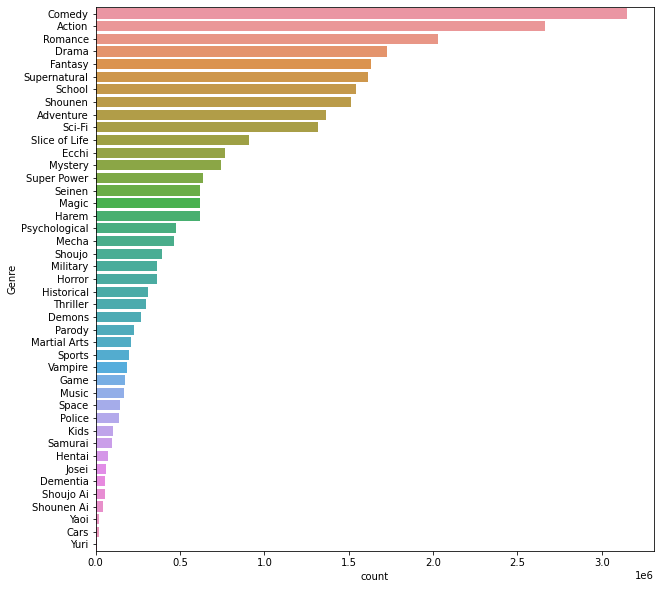

In [ ]:
genres_df = genres_df.sort_values(by='count',ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(genres_df['count'],genres_df['Genre'])

### Plot by users in each type

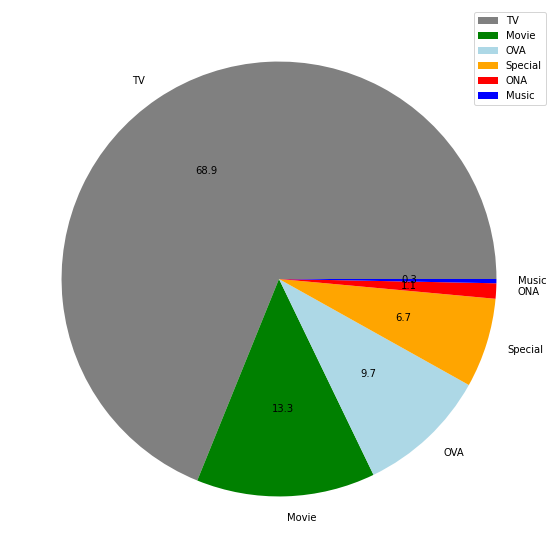

In [ ]:
labels = anime_rating['type'].value_counts().index
values = anime_rating['type'].value_counts().values
plt.figure(figsize=(15,10))
plt.pie(x=values,labels=labels,autopct='%.1f',colors=['grey','green','lightblue','orange','red','blue'])
plt.legend()
plt.show()

###Top 10 anime based on rating counts

In [ ]:
rating_count = anime_rating.groupby(by = ['name'])['user_rating'].count().reset_index()[['name', 'user_rating']]
rating_count.rename(columns = {'user_rating': 'Rating_Count'},inplace=True)
rating_count_data = rating_count.sort_values(by='Rating_Count',ascending=False).head(10)
rating_count_data

,name,Rating_Count
1674,Death Note,34226
8386,Sword Art Online,26309
7861,Shingeki no Kyojin,25289
1417,Code Geass Hangyaku no Lelouch,24125
363,Angel Beats,23565
2149,Elfen Lied,23528
6032,Naruto,22071
2366,Fullmetal Alchemist Brotherhood,21494
3988,K On,21336
2365,Fullmetal Alchemist,21332


[Text(0, 0, 'Death Note'),
 Text(0, 0, 'Sword Art Online'),
 Text(0, 0, 'Shingeki no Kyojin'),
 Text(0, 0, 'Code Geass Hangyaku no Lelouch'),
 Text(0, 0, 'Angel Beats '),
 Text(0, 0, 'Elfen Lied'),
 Text(0, 0, 'Naruto'),
 Text(0, 0, 'Fullmetal Alchemist Brotherhood'),
 Text(0, 0, 'K On '),
 Text(0, 0, 'Fullmetal Alchemist')]

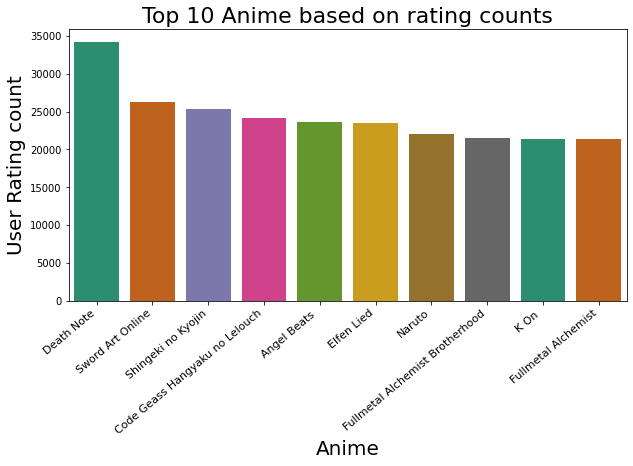

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(rating_count_data['name'], rating_count_data['Rating_Count'],palette="Dark2" )
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count',fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")


### Top 10 based on Member count

In [ ]:
check_duplicate = anime_rating.duplicated(subset=['name']).sum()
check_duplicate

6327261

In [ ]:
removed_duplicate =anime_rating.drop_duplicates(subset=['name'])
removed_duplicate.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,user_rating
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1961,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10.0
23455,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,43,10.0
24643,9253,Steins Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9.0
41794,9969,Gintama 039,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9.0


[Text(0, 0, 'Death Note'),
 Text(0, 0, 'Shingeki no Kyojin'),
 Text(0, 0, 'Sword Art Online'),
 Text(0, 0, 'Fullmetal Alchemist Brotherhood'),
 Text(0, 0, 'Angel Beats '),
 Text(0, 0, 'Code Geass Hangyaku no Lelouch'),
 Text(0, 0, 'Naruto'),
 Text(0, 0, 'Steins Gate'),
 Text(0, 0, 'Mirai Nikki TV '),
 Text(0, 0, 'Toradora ')]

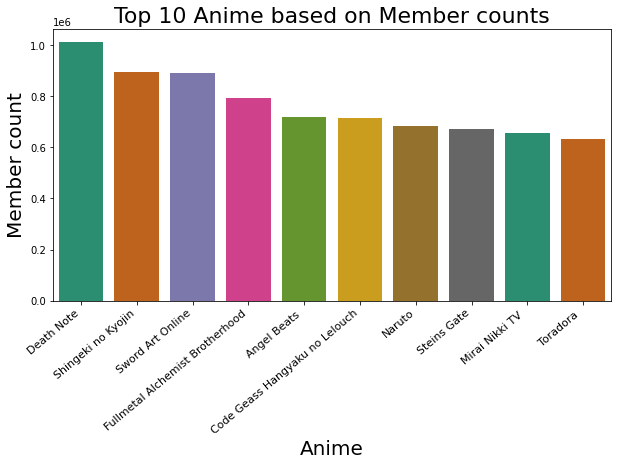

In [ ]:
member_count = removed_duplicate[['name', 'members']].sort_values(by = 'members',ascending = False).head(10)
plt.figure(figsize=(10,5))
ax = sns.barplot(member_count['name'], member_count['members'],palette="Dark2" )
ax.set_title('Top 10 Anime based on Member counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('Member count',fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")

# Popularity-Based Recommender

In [ ]:
anime_rating_data=anime_rating.merge(rating_count, left_on = 'name', right_on = 'name', how = 'left')
anime_rating_data.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,user_rating,Rating_Count
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,1961
1,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0,1961
2,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,1961
3,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,1961
4,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10.0,1961


In [ ]:
new_rating_data = anime_rating_data.drop_duplicates(subset=['name'])
new_rating_data.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,user_rating,Rating_Count
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,1961
1961,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10.0,21494
23455,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,43,10.0,1188
24643,9253,Steins Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9.0,17151
41794,9969,Gintama 039,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9.0,3115


Weighted_rating formula = (v/(v+m) * R) + (m/(m+v) * C)

where,  
v = user rating

m = animes having total rate count greater than 75%

r = rating count

c = mean rating across all the animes

In [ ]:
c = new_rating_data['avg_rating'].mean()
m = new_rating_data['Rating_Count'].quantile(0.75)

def weighted_rating(x, m=m, c=c):
    v = x['Rating_Count']
    r = x['avg_rating']
    return (v/(v+m) * r) + (m/(m+v) * c)

In [ ]:
new_data = new_rating_data.copy().loc[new_rating_data['Rating_Count'] >= m]
new_data["weighted_rating"] = new_data.apply(weighted_rating, axis=1, args=(m, c))
new_data.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,user_rating,Rating_Count,weighted_rating
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,1961,8.901986
1961,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10.0,21494,9.211579
23455,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,43,10.0,1188,8.583844
24643,9253,Steins Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9.0,17151,9.111633
41794,9969,Gintama 039,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9.0,3115,8.869511


Text(0, 0.5, 'Anime')

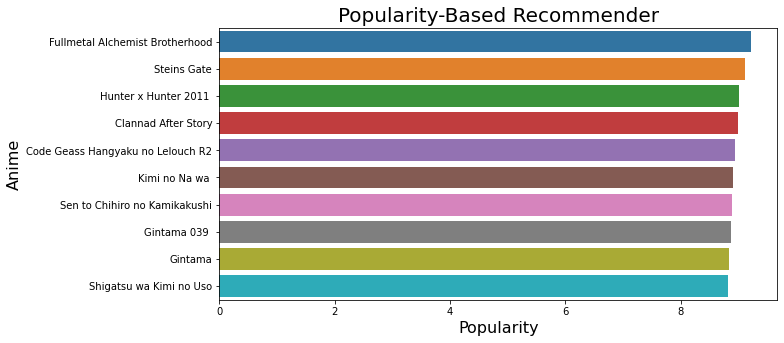

In [ ]:
new_data_graph = new_data.sort_values('weighted_rating', ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(new_data_graph['weighted_rating'], new_data_graph['name'])
ax.set_title('Popularity-Based Recommender',fontsize = 20)
ax.set_xlabel('Popularity',fontsize = 16) 
ax.set_ylabel('Anime',fontsize = 16)


# Content based recsys

In [ ]:
content_data = new_data.copy()


content_data

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,user_rating,Rating_Count,weighted_rating
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,1961,8.901986
1961,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10.0,21494,9.211579
23455,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,43,10.0,1188,8.583844
24643,9253,Steins Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9.0,17151,9.111633
41794,9969,Gintama 039,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9.0,3115,8.869511
...,...,...,...,...,...,...,...,...,...,...,...
6323571,755,Boku no Sexual Harassment,"Hentai, Yaoi",OVA,3,5.96,9980,304,6.0,449,6.256519
6329624,724,Enzai,"Hentai, Horror, Yaoi",OVA,2,5.55,13711,123,5.0,614,5.959198
6332917,5391,Pico to Chico,"Hentai, Yaoi",OVA,1,5.19,29463,20,9.0,1047,5.575537
6334019,4866,Pico x CoCo x Chico,"Hentai, Yaoi",OVA,1,5.16,27411,111,10.0,977,5.573847


In [ ]:
content_data = content_data[['name', 'genre', 'type', 'weighted_rating']]
content_data.head()

,name,genre,type,weighted_rating
0,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,8.901986
1961,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.211579
23455,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,8.583844
24643,Steins Gate,"Sci-Fi, Thriller",TV,9.111633
41794,Gintama 039,"Action, Comedy, Historical, Parody, Samurai, S...",TV,8.869511


In [ ]:
#reset index
content_data.reset_index(drop=True,inplace=True)
content_data.head()

,name,genre,type,weighted_rating
0,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,8.901986
1,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.211579
2,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,8.583844
3,Steins Gate,"Sci-Fi, Thriller",TV,9.111633
4,Gintama 039,"Action, Comedy, Historical, Parody, Samurai, S...",TV,8.869511


Breakdown the genre and type

In [ ]:


df = pd.concat([content_data, content_data['type'].str.get_dummies(), content_data['genre'].str.get_dummies(sep=',')], axis=1)
df.head()



,name,genre,type,weighted_rating,Movie,Music,ONA,OVA,Special,TV,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Mecha,Military,Music,Mystery,Psychological,Romance,School,Sci-Fi,Seinen,Shoujo,Shounen,Slice of Life,Sports
0,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,8.901986,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.211579,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,8.583844,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Steins Gate,"Sci-Fi, Thriller",TV,9.111633,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Gintama 039,"Action, Comedy, Historical, Parody, Samurai, S...",TV,8.869511,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
anime_features = df.loc[:, "Movie":].copy()
anime_features.head()

,Movie,Music,ONA,OVA,Special,TV,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Mecha,Military,Music,Mystery,Psychological,Romance,School,Sci-Fi,Seinen,Shoujo,Shounen,Slice of Life,Sports
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cosine_sim = cosine_similarity(anime_features.values, anime_features.values)


cosine_sim



array([[1.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.375, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.375, 1.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 1.   , 1.   , 1.   ],
       [0.   , 0.   , 0.   , ..., 1.   , 1.   , 1.   ],
       [0.   , 0.   , 0.   , ..., 1.   , 1.   , 1.   ]])

In [ ]:
cosine_sim.shape

(2469, 2469)

In [ ]:
anime_index = pd.Series(df.index, index=df.name).drop_duplicates()

In [ ]:
def get_recommendation(anime_name, similarity=cosine_sim):
    index = anime_index[anime_name]
    
    # pairwsie similarity scores of all anime wrt chosen anime
    similar = list(enumerate(cosine_sim[index]))

    # Sort based on the similarity scores
    similar = sorted(similar, key=lambda x: x[1], reverse=True)

    # top 10 most similar anime
    similar = similar[0:10]

    # anime indices
    anime_indices = [i[0] for i in similar]

    # top 10 most similar anime
    result = df[['name', 'genre', 'weighted_rating']].iloc[anime_indices].drop(index)
    return result

In [ ]:
print("Anime name for recommendation: ")
recom = input()
get_recommendation(recom)

Anime name for recommendation: 


In [ ]:


get_recommendation("Naruto")



In [ ]:
get_recommendation("Tokyo Ghoul")